In [13]:
%cd /content/drive/MyDrive/Colab/naampy/

/content/drive/MyDrive/Colab/naampy


In [14]:
%ls

data/       data_with_prop.ipynb  saved_model/  train_with_prop.ipynb
data.ipynb  model.h5              train.ipynb


In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

# Import data

In [16]:
df = pd.read_csv('data/naampy_final_prop.csv')

In [17]:
df.head()

,first_name,gender,female_prop
0,aa,male,0.044734
1,aaa,male,0.260188
2,aaaa,female,0.742647
3,aaaamsoo,female,0.675344
4,aaaan,male,0.029126


In [31]:
df[df['female_prop'] == 0.501]

,first_name,gender,female_prop


In [32]:
df[df['first_name'].str.len() <= 2]

,first_name,gender,female_prop
0,aa,male,0.044734
3610,ab,male,0.311203
4358,ac,male,0.442623
4956,ag,male,0.300971
5153,ah,male,0.361169
...,...,...,...
196973,ys,male,0.445378
196974,yu,male,0.325714
197228,zd,male,0.430876
197247,zk,female,0.519231


In [33]:
df = df.drop(df[df['first_name'].str.len() <= 2].index)

In [34]:
df[df['first_name'].str.len() >= 20]

,first_name,gender,female_prop
21685,bhaanaabhagavaanavaalaa,male,0.491620
21746,bhaanooprathaapasimh,male,0.000000
22339,bhagaaouatheeprasaad,male,0.000000
32420,chandrakaamthaabaaee,female,1.000000
32429,chandrakaanthaabaaee,female,1.000000
32560,chandrasekharannayar,male,0.009174
56644,gopalakrishnakkurupp,male,0.000000
56647,gopalakrishnanachari,male,0.000000
90217,krishnaprathaapasimh,male,0.000000
91115,kumarakhaaneeyaasaaparaa,male,0.458065


In [35]:
def find_seq_chars(s, seq_len=2):
  prev = ""
  count = 1
  match = False
  for i in s:
    if i == prev:
      count += 1
    else:
      count = 1
    
    prev = i
    if count == seq_len:
      return True
  return match

In [36]:
df[df['first_name'].apply(lambda x : find_seq_chars(x, 3))]

,first_name,gender,female_prop
1,aaa,male,0.260188
2,aaaa,female,0.742647
3,aaaamsoo,female,0.675344
4,aaaan,male,0.029126
5,aaab,male,0.053333
...,...,...,...
196434,yeeelavaad,male,0.472603
196808,yoogamaaaa,female,0.996219
197076,yuliaaa,female,0.995633
197109,yuriaaa,male,0.239175


In [37]:
df = df.drop(df[df['first_name'].apply(lambda x : find_seq_chars(x, 3))].index)

In [38]:
df.shape

(195979, 3)

In [39]:
import re
def find_numbers(x):
  return len(re.findall('[0-9]+', x)) > 0

df[df['first_name'].apply(lambda x: find_numbers(x))]

,first_name,gender,female_prop


In [40]:
df['gender_codes'] = df.gender.astype('category').cat.codes

In [41]:
df.head()

,first_name,gender,female_prop,gender_codes
179,aab,male,0.292818,1
180,aabaa,male,0.351738,1
181,aabaad,male,0.047183,1
182,aabaadaa,female,0.983333,0
183,aabaadaar,female,0.515075,0


In [42]:
classes = df.groupby('gender').count().index

In [43]:
classes

Index(['female', 'male'], dtype='object', name='gender')

In [44]:
df.groupby('gender').count()

,first_name,female_prop,gender_codes
gender,,,
female,101718,101718,101718
male,94261,94261,94261


In [45]:
df.shape

(195979, 4)

In [57]:
df[['first_name', 'female_prop']].values

array([['aab', 0.292817679558011],
       ['aabaa', 0.3517382413087934],
       ['aabaad', 0.0471827759963353],
       ...,
       ['zulfiqar', 0.0],
       ['zungkum', 0.0],
       ['zuthunglo', 0.9891304347826086]], dtype=object)

# Split data

In [58]:
X = df[['first_name', 'female_prop']].values
y = df['gender_codes'].values

In [59]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [60]:
X_train.size

274370

In [61]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int8), array([71341, 65844]))

In [62]:
X_rem.size

117588

In [63]:
np.unique(y_rem, return_counts=True)

(array([0, 1], dtype=int8), array([30377, 28417]))

In [64]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

In [65]:
y_train = to_categorical(y_train, len(classes))
y_val = to_categorical(y_val, len(classes))
y_test = to_categorical(y_test, len(classes))

In [66]:
y_train[1]

array([1., 0.], dtype=float32)

In [67]:
X_train[1]

array(['bhakathi', 0.5302013422818792], dtype=object)

In [69]:
X_train.shape

(137185, 2)

# Tokenization

In [70]:
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')

In [71]:
tk.fit_on_texts(df['first_name'].values)

In [72]:
alphabet="abcdefghijklmnopqrstuvwxyz"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

In [73]:
char_dict

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [74]:
# Use char_dict to replace the tk.word_index
tk.word_index = char_dict.copy() 
# Add 'UNK' to the vocabulary 
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

In [75]:
tk.word_index

{'UNK': 27,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [76]:
df['first_name'].str.len().max()

24

In [84]:
X_train[:,0]

array(['kadanoor', 'bhakathi', 'gajendran', ..., 'pit', 'rkanee',
       'nizamuddeen'], dtype=object)

In [85]:
train_sequences = tk.texts_to_sequences(X_train[:,0])

In [86]:
train_sequences[0]

[11, 1, 4, 1, 14, 15, 15, 18]

In [87]:
X_train[0]

array(['kadanoor', 0.5083932853717026], dtype=object)

In [88]:
y_train[0]

array([1., 0.], dtype=float32)

In [89]:
validation_sequences = tk.texts_to_sequences(X_val[:,0])
test_sequences = tk.texts_to_sequences(X_test[:,0])

In [91]:
# Padding
X_train_seq = pad_sequences(train_sequences, maxlen=24, padding='post')
X_val_seq = pad_sequences(validation_sequences, maxlen=24, padding='post')
X_test_seq = pad_sequences(test_sequences, maxlen=24, padding='post')

In [94]:
X_train_prop = X_train[:,1]
X_val_prop = X_val[:,1]
X_test_prop = X_test[:,1]

In [96]:
X_train[0]

array(['kadanoor', 0.5083932853717026], dtype=object)

In [95]:
X_train_seq[0]

array([11,  1,  4,  1, 14, 15, 15, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [97]:
X_train_prop[0]

0.5083932853717026

In [98]:
y_train[0]

array([1., 0.], dtype=float32)

In [119]:
X_train_seq.shape

(137185, 24)

In [120]:
y_train.shape

(137185, 2)

# Creating Dataset

In [146]:
tf.data.Dataset.from_tensors((X_train_seq, y_train))

<TensorDataset element_spec=(TensorSpec(shape=(137185, 24), dtype=tf.int32, name=None), TensorSpec(shape=(137185, 2), dtype=tf.float32, name=None))>

In [154]:
tf.data.Dataset.from_tensor_slices((X_train_seq, y_train))

<TensorSliceDataset element_spec=(TensorSpec(shape=(24,), dtype=tf.int32, name=None), TensorSpec(shape=(2,), dtype=tf.float32, name=None))>

In [148]:
tf.data.Dataset.from_tensors((np.asarray(X_train_prop).astype('float32')))

<TensorDataset element_spec=TensorSpec(shape=(137185,), dtype=tf.float32, name=None)>

In [156]:
train_dataset = tf.data.Dataset.from_tensors(({"seq_input": tf.data.Dataset.from_tensor_slices((X_train_seq, y_train)),
                                     "prop_input": np.asarray(X_train_prop).astype('float32')}))

val_dataset = tf.data.Dataset.from_tensors(({"seq_input": tf.data.Dataset.from_tensor_slices((X_val_seq, y_val)),
                                     "prop_input": np.asarray(X_val_prop).astype('float32')}))

test_dataset = tf.data.Dataset.from_tensors(({"seq_input": tf.data.Dataset.from_tensor_slices((X_test_seq, y_test)),
                                     "prop_input": np.asarray(X_test_prop).astype('float32')}))

In [157]:
train_dataset

<TensorDataset element_spec={'seq_input': DatasetSpec((TensorSpec(shape=(24,), dtype=tf.int32, name=None), TensorSpec(shape=(2,), dtype=tf.float32, name=None)), TensorShape([])), 'prop_input': TensorSpec(shape=(137185,), dtype=tf.float32, name=None)}>

# Vectorization

In [106]:
vocab_size = len(tk.word_index)
vocab_size

27

In [107]:
embedding_weights = [] 
embedding_weights.append(np.zeros(vocab_size)) # first row is pad

for char, i in tk.word_index.items(): 
    onehot = np.zeros(vocab_size)
    onehot[i-1] = 1
    embedding_weights.append(onehot)
embedding_weights = np.array(embedding_weights)

In [108]:
print(embedding_weights.shape) # first row all 0 for PAD, 26 char, last row for UNK
embedding_weights

(28, 27)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [109]:
# max length of first name 
input_size = 24
# vocab_size = 27
embedding_size = 27
conv_layers = [[128, 7, 3], 
               [128, 3, -1], 
               [128, 3, -1]]

fully_connected_layers = [512, 512]
num_of_classes = len(classes)
dropout_p = 0.5
optimizer = 'adam'
loss = 'categorical_crossentropy'

In [110]:
# Embedding layer Initialization
embedding_layer = tf.keras.layers.Embedding(vocab_size+1, 
                            embedding_size,
                            input_length=input_size,
                            weights=[embedding_weights])

# Model

In [138]:
# sequence inputs
seq_inputs = tf.keras.layers.Input(shape=(input_size,), name='seq_input', dtype='int64')  # shape=(?, 24)
# Embedding 
x = embedding_layer(seq_inputs)


# Conv 
for filter_num, filter_size, pooling_size in conv_layers:
    print(filter_num, filter_size, pooling_size)
    x = tf.keras.layers.Conv1D(filter_num, filter_size)(x)
    x = tf.keras.layers.Activation('relu')(x)
    if pooling_size != -1:
        x = tf.keras.layers.MaxPooling1D(pool_size=pooling_size)(x) # Final shape=(None, 34, 256)
    print(x)
x = tf.keras.layers.Flatten()(x) # (None, 8704)
# Fully connected layers 
for dense_size in fully_connected_layers:
    x = tf.keras.layers.Dense(dense_size, activation='relu')(x) # dense_size == 1024
    x = tf.keras.layers.Dropout(dropout_p)(x)


# prop inputs
prop_inputs = tf.keras.layers.Input(shape=(1,), name='prop_input', dtype='float32')
x_prop = tf.keras.layers.Dense(5, activation=tf.keras.activations.relu)(prop_inputs)

# Concatenate
concat = tf.keras.layers.Concatenate()([x, x_prop])

# Output Layer
predictions = tf.keras.layers.Dense(num_of_classes, activation='softmax')(concat)
# Build model
model = tf.keras.models.Model(inputs=[seq_inputs,prop_inputs], outputs=predictions)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy']) # Adam, categorical_crossentropy
model.summary()

128 7 3
KerasTensor(type_spec=TensorSpec(shape=(None, 6, 128), dtype=tf.float32, name=None), name='max_pooling1d_2/Squeeze:0', description="created by layer 'max_pooling1d_2'")
128 3 -1
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 128), dtype=tf.float32, name=None), name='activation_7/Relu:0', description="created by layer 'activation_7'")
128 3 -1
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 128), dtype=tf.float32, name=None), name='activation_8/Relu:0', description="created by layer 'activation_8'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 seq_input (InputLayer)         [(None, 24)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 24, 27)       756         ['seq_i

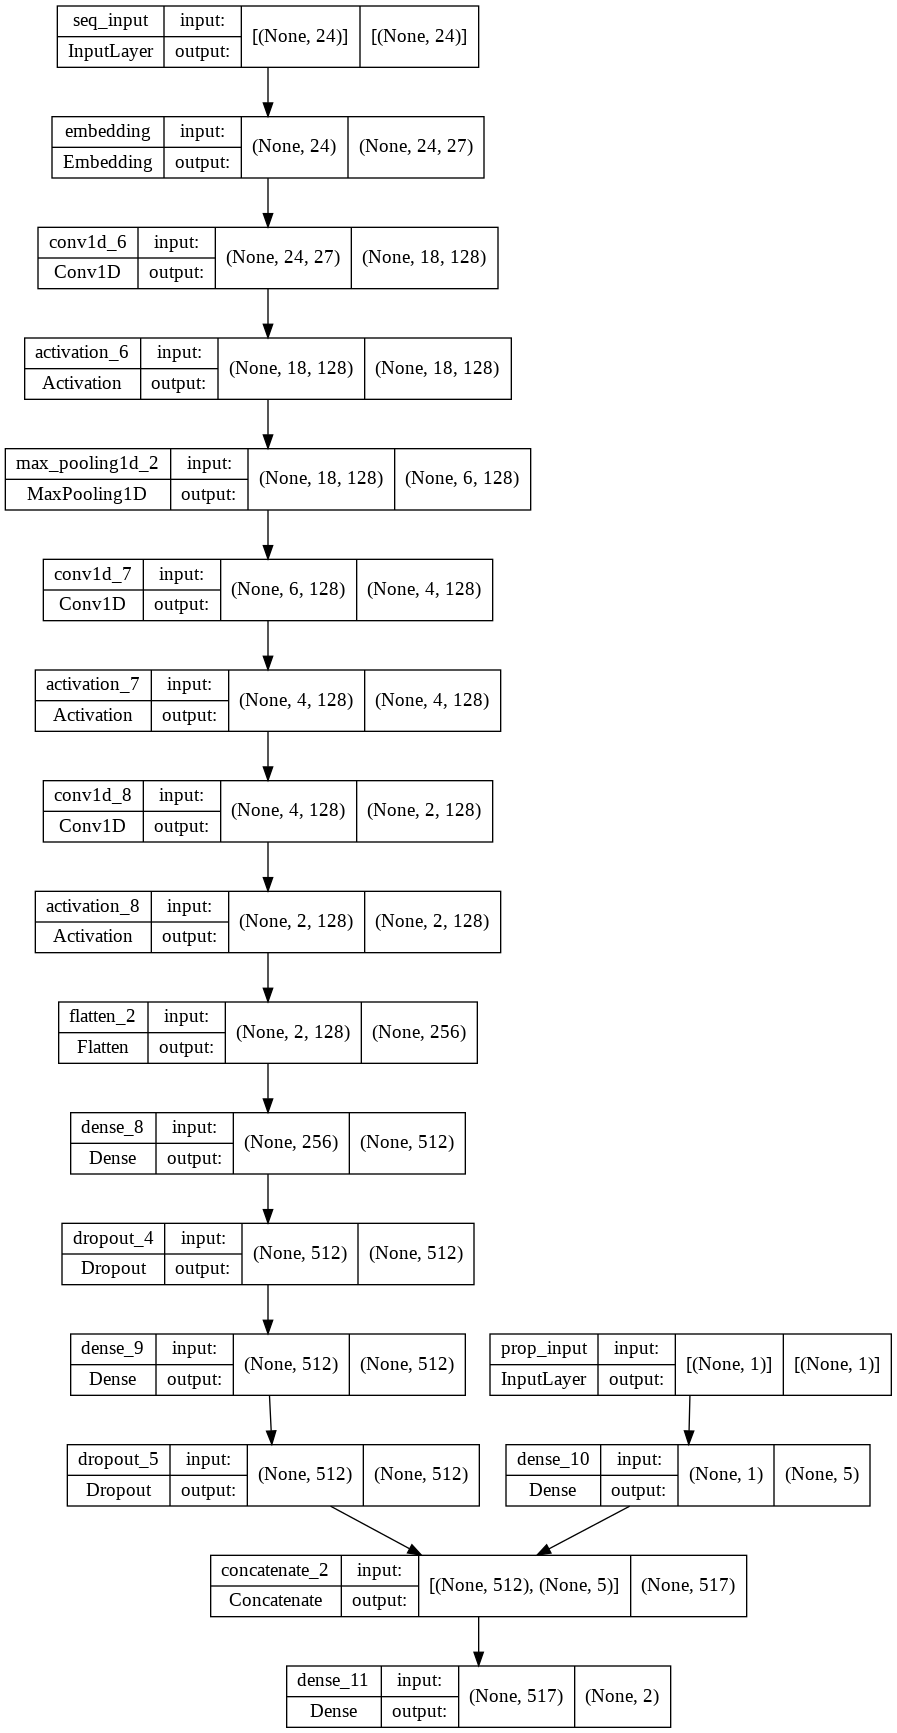

In [152]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [139]:
model_save_filename = "model.h5"

In [140]:
batch_size = 64
epochs = 500

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    patience = 10,
    restore_best_weights = True
)

mdlcheckpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    model_save_filename,
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    save_best_only = True
)


In [163]:
tf.config.experimental_run_functions_eagerly(True)


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [164]:
history = model.fit(
    x=[X_train_seq, np.asarray(X_train_prop).astype('float32')],y=y_train,
    batch_size = batch_size,
    validation_data=([X_val_seq, np.asarray(X_val_prop).astype('float32')], y_val),
    epochs=epochs,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb])

Epoch 1/500
   1/2144 [..............................] - ETA: 3:58 - loss: 0.6842 - accuracy: 0.4844

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


2144/2144 [==============================] - ETA: 0s - loss: 0.2187 - accuracy: 0.9124
Epoch 1: val_accuracy improved from -inf to 0.96370, saving model to model.h5
2144/2144 [==============================] - 69s 32ms/step - loss: 0.2187 - accuracy: 0.9124 - val_loss: 0.1117 - val_accuracy: 0.9637
Epoch 2/500
2143/2144 [============================>.] - ETA: 0s - loss: 0.1032 - accuracy: 0.9601
Epoch 2: val_accuracy did not improve from 0.96370
2144/2144 [==============================] - 69s 32ms/step - loss: 0.1032 - accuracy: 0.9601 - val_loss: 0.0890 - val_accuracy: 0.9622
Epoch 3/500
2143/2144 [============================>.] - ETA: 0s - loss: 0.0841 - accuracy: 0.9680
Epoch 3: val_accuracy improved from 0.96370 to 0.97935, saving model to model.h5
2144/2144 [==============================] - 69s 32ms/step - loss: 0.0841 - accuracy: 0.9680 - val_loss: 0.0733 - val_accuracy: 0.9794
Epoch 4/500
2143/2144 [============================>.] - ETA: 0s - loss: 0.0722 - accuracy: 0.9732
E

KeyboardInterrupt: ignored

# Evaluate

In [166]:
loss, accuracy = model.evaluate([X_test_seq, np.asarray(X_test_prop).astype('float32')], y_test)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

  9/919 [..............................] - ETA: 12s - loss: 0.0291 - accuracy: 0.9896

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


919/919 [==============================] - 13s 15ms/step - loss: 0.0314 - accuracy: 0.9866
Loss:  0.03144187480211258
Accuracy:  0.9865972995758057


# Plot

In [167]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

NameError: ignored

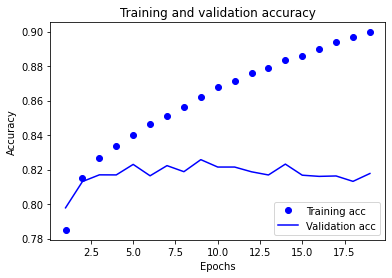

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Save model

In [ ]:
model.save('saved_model/naampy')

INFO:tensorflow:Assets written to: saved_model/naampy/assets


In [ ]:
df[df['first_name'] == 'katrina']

,first_name,gender,gender_codes


# Inference

In [168]:
input = [
         "rajinikanth",
         "harvin",
         "shyamsingha",
         "kamalhasan",
         "srihan",
         "thammam",
         "bahubali",
         "rajarajeshwari",
         "shobby",
         "tamannaah bhatia",
         "mehreen",
         "kiara",
         "shivathmika",
         "komalee",
         "nazriya",
         "nabha",
         "taapsee",
         "parineeti",
         "katrina",
         "ileana",
         "vishwaksen",
         "sampoornesh",
         "hrithik",
         "emraan",
         "rajkummar",
         "sharman",
         "ayushmann",
         "irrfan",
         "riteish"
]

sequences = tk.texts_to_sequences(input)
final = pad_sequences(sequences, maxlen=24, padding='post')
print(final)

[[18  1 10  9 14  9 11  1 14 20  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  1 18 22  9 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19  8 25  1 13 19  9 14  7  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  1 13  1 12  8  1 19  1 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19 18  9  8  1 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  8  1 13 13  1 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  8 21  2  1 12  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  1 10  1 18  1 10  5 19  8 23  1 18  9  0  0  0  0  0  0  0  0  0  0]
 [19  8 15  2  2 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  1 13  1 14 14  1  1  8 27  2  8  1 20  9  1  0  0  0  0  0  0  0  0]
 [13  5  8 18  5  5 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  9  1 18  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [19  8  9 22  1 20  8 13  9 11  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11 15 13  1 12  5  5  0

In [198]:
input_prop = np.asarray(len(input) * [0.1]).astype('float32')
input_prop

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1], dtype=float32)

In [199]:
results = model.predict([final, input_prop] )
probs = tf.nn.softmax(results)
res_args = tf.argmax(probs, 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [200]:
probs

<tf.Tensor: shape=(29, 2), dtype=float32, numpy=
array([[0.26895213, 0.7310479 ],
       [0.26896346, 0.73103654],
       [0.27022076, 0.72977924],
       [0.26959348, 0.7304065 ],
       [0.26895696, 0.73104304],
       [0.26917854, 0.73082143],
       [0.2689477 , 0.7310523 ],
       [0.2689416 , 0.73105836],
       [0.2691129 , 0.73088706],
       [0.26898998, 0.7310101 ],
       [0.26897222, 0.7310278 ],
       [0.26899496, 0.731005  ],
       [0.27020666, 0.7297933 ],
       [0.27017796, 0.72982204],
       [0.26900312, 0.73099685],
       [0.26904276, 0.7309572 ],
       [0.26907066, 0.7309294 ],
       [0.2689536 , 0.73104644],
       [0.26896262, 0.7310374 ],
       [0.26899052, 0.7310095 ],
       [0.26905027, 0.7309497 ],
       [0.26907298, 0.730927  ],
       [0.26909608, 0.7309039 ],
       [0.26897743, 0.73102254],
       [0.26895434, 0.73104566],
       [0.2689602 , 0.73103976],
       [0.26968163, 0.73031837],
       [0.26913214, 0.7308679 ],
       [0.26896033, 0.73103

In [201]:
res_args

<tf.Tensor: shape=(29,), dtype=int64, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])>

In [202]:
for i in range(len(input)):
  print(f"{input[i]} : {classes[res_args[i]]}")

rajinikanth : male
harvin : male
shyamsingha : male
kamalhasan : male
srihan : male
thammam : male
bahubali : male
rajarajeshwari : male
shobby : male
tamannaah bhatia : male
mehreen : male
kiara : male
shivathmika : male
komalee : male
nazriya : male
nabha : male
taapsee : male
parineeti : male
katrina : male
ileana : male
vishwaksen : male
sampoornesh : male
hrithik : male
emraan : male
rajkummar : male
sharman : male
ayushmann : male
irrfan : male
riteish : male


# load and test the model

In [ ]:
import_model = tf.keras.models.load_model('saved_model/naampy')

In [ ]:
import_model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 24)]              0         
                                                                 
 embedding_23 (Embedding)    (None, 24, 27)            756       
                                                                 
 conv1d_68 (Conv1D)          (None, 18, 128)           24320     
                                                                 
 activation_60 (Activation)  (None, 18, 128)           0         
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 6, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_69 (Conv1D)          (None, 4, 128)            49280     
                                                          

In [ ]:
results = import_model.predict(final)
probs = tf.nn.softmax(results)
res_args = tf.argmax(probs, 1)
for i in range(len(input)):
  print(f"{input[i]} : {classes[res_args[i]]}")

rajinikanth : male
harvin : male
shyamsingha : male
kamalhasan : male
srihan : male
thammam : male
bahubali : male
rajarajeshwari : female
shobby : male
tamannaah bhatia : female
mehreen : female
kiara : female
